 Does the classifier demonstrate gender bias?


In [1]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import time
warnings.filterwarnings("ignore")
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/TRAIN.csv")
data_validation = pd.read_csv("2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/VALIDATION.csv")

tfidf_train_path= "2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/TFIDF_TRAIN.csv"
tfidf_validation_path= "2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/TFIDF_VALIDATION.csv"
X_train_tfidf = pd.read_csv(tfidf_train_path)
X_train_tfidf = X_train_tfidf.iloc[:, 1:]
X_validation_tfidf = pd.read_csv(tfidf_validation_path)
X_validation_tfidf = X_validation_tfidf.iloc[:,1:]
print(X_train_tfidf.shape)

embedding_train_path = "2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/384EMBEDDINGS_TRAIN.csv"
embedding_validation_path = "2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/384EMBEDDINGS_VALIDATION.csv"
X_train_embeddings = pd.read_csv(embedding_train_path)
X_train_embeddings = X_train_embeddings.iloc[:,1:]
X_validation_embeddings = pd.read_csv(embedding_validation_path)
X_validation_embeddings = X_validation_embeddings.iloc[:,1:]
print(X_train_embeddings.shape)
print(X_validation_embeddings.shape)

removeList = []
# Find the row index and remove the corresponding rows
for i in range(len(data_train)):
    comment = data_train.loc[i, 'review-text-cleaned']
    if comment == ' ' or comment == '' or comment == '. ' or comment == '.  ' or comment == '.   ' or comment == '.    ' or comment == '.     ':
        removeList.append(i)


X_train_txt = data_train.iloc[:,1:-1]
y_train_target = data_train.iloc[:,-1]
X_validation_txt = data_validation.iloc[:,1:-1]
y_validation_target = data_validation.iloc[:,-1]

# remove the rows with blank comment in training data
removed_train_txt = data_train.drop(removeList)
removed_train_txt = removed_train_txt.iloc[:,1:-1]
print(type(removed_train_txt))
print(removed_train_txt.shape)

removed_train_tfidf = X_train_tfidf.drop(removeList)
print(type(removed_train_tfidf))
print(removed_train_tfidf.shape)

removed_train_embedding = X_train_embeddings.drop(removeList)
print(type(removed_train_embedding))
print(removed_train_embedding.shape)

removed_train_label = data_train.drop(removeList).iloc[:,-1]
print(type(removed_train_label))
print(removed_train_label.shape)


(43003, 500)
(43003, 384)
(5500, 384)
<class 'pandas.core.frame.DataFrame'>
(41729, 3)
<class 'pandas.core.frame.DataFrame'>
(41729, 500)
<class 'pandas.core.frame.DataFrame'>
(41729, 384)
<class 'pandas.core.series.Series'>
(41729,)


In [3]:
y_train_target_categorical = []
y_validation_target_categorical = []

for i in y_train_target:
    if i == 1:
        y_train_target_categorical.append('good')
    else:
        y_train_target_categorical.append('bad')

for i in y_validation_target:
    if i == 1:
        y_validation_target_categorical.append('good')
    else:
        y_validation_target_categorical.append('bad')



removed_y_train_target_categorical = []
for i in removed_train_label:
    if i == 1:
        removed_y_train_target_categorical.append('good')
    else:
        removed_y_train_target_categorical.append('bad')


BaseLine Method(s)

Zero_R model

In [7]:
# It will use implementation of Zero-R model

# First, the orginal dataset
dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(X_train_txt, y_train_target)
dummy_predict = dummy_clf.predict(X_validation_txt)
accuracy = accuracy_score(y_validation_target, dummy_predict)
print("accuracy of zero-R for original dataset:", accuracy.round(2))
print(classification_report(y_validation_target, dummy_predict, zero_division = 0))

# Second, the tf-idf dataset
dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(X_train_tfidf, y_train_target)
dummy_predict = dummy_clf.predict(X_validation_tfidf)
accuracy = accuracy_score(y_validation_target, dummy_predict)
print("accuracy of zero-R for tf-idf dataset", accuracy.round(2))
print(classification_report(y_validation_target, dummy_predict, zero_division = 0))

# Last, we use embedding dataset
dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(X_train_embeddings, y_train_target)
dummy_predict = dummy_clf.predict(X_validation_embeddings)
accuracy = accuracy_score(y_validation_target, dummy_predict)
print("accuracy of zero-R for embedding dataset", accuracy.round(2))
print(classification_report(y_validation_target, dummy_predict, zero_division = 0))




accuracy of zero-R for original dataset: 0.73
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1462
           1       0.73      1.00      0.85      4038

    accuracy                           0.73      5500
   macro avg       0.37      0.50      0.42      5500
weighted avg       0.54      0.73      0.62      5500

accuracy of zero-R for tf-idf dataset 0.73
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1462
           1       0.73      1.00      0.85      4038

    accuracy                           0.73      5500
   macro avg       0.37      0.50      0.42      5500
weighted avg       0.54      0.73      0.62      5500

accuracy of zero-R for embedding dataset 0.73
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1462
           1       0.73      1.00      0.85      4038

    accuracy                           0.73    

In [9]:
# It will use implementation of Zero-R model
# This time, we will use the training dataset after deleting rows with blank comments
# and almost blank comments

# First, the dataset modified from orginal dataset
dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(removed_train_txt, removed_train_label)
dummy_predict = dummy_clf.predict(X_validation_txt)
accuracy = accuracy_score(y_validation_target, dummy_predict)
print("accuracy of zero-R for original dataset:", accuracy.round(2))
print(classification_report(y_validation_target, dummy_predict, zero_division = 0))

# Second, the modified tf-idf dataset 
dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(removed_train_tfidf, removed_train_label)
dummy_predict = dummy_clf.predict(X_validation_tfidf)
accuracy = accuracy_score(y_validation_target, dummy_predict)
print("accuracy of zero-R for tf-idf dataset", accuracy.round(2))
print(classification_report(y_validation_target, dummy_predict, zero_division = 0))

# Last, we use modified embedding dataset
dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(removed_train_embedding, removed_train_label)
dummy_predict = dummy_clf.predict(X_validation_embeddings)
accuracy = accuracy_score(y_validation_target, dummy_predict)
print("accuracy of zero-R for embedding dataset", accuracy.round(2))
print(classification_report(y_validation_target, dummy_predict, zero_division = 0))

accuracy of zero-R for original dataset: 0.73
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1462
           1       0.73      1.00      0.85      4038

    accuracy                           0.73      5500
   macro avg       0.37      0.50      0.42      5500
weighted avg       0.54      0.73      0.62      5500

accuracy of zero-R for tf-idf dataset 0.73
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1462
           1       0.73      1.00      0.85      4038

    accuracy                           0.73      5500
   macro avg       0.37      0.50      0.42      5500
weighted avg       0.54      0.73      0.62      5500

accuracy of zero-R for embedding dataset 0.73
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1462
           1       0.73      1.00      0.85      4038

    accuracy                           0.73    

In [32]:
import random

class RandomBaselineModel:
    def __init__(self, classes):
        self.classes = classes

    def predict(self, X):
        num_samples = X.shape[0]
        random_predictions = [random.choice(self.classes) for _ in range(num_samples)]
        return random_predictions

X = X_validation_tfidf
if __name__ == "__main__":
    classes = ['bad', 'good']
    random_baseline_model = RandomBaselineModel(classes)
    predictions = random_baseline_model.predict(X)
    print("accuracy: ", accuracy_score(predictions, y_validation_target_categorical))

accuracy:  0.5083636363636364


Naive Bayes Method

NB

In this section, I will try multiple NB models such as Gaussian Naive Bayes and Bernoulli Naive Bayes and use one model for each kind of dataset

In [33]:
# tf-idf dataset

GNB_Acc_1_tfidf = []
BNB_Acc_1_tfidf = []
MNB_Acc_1_tfidf = []

X_train = X_train_tfidf
y_train = y_train_target

#---------------- Gaussian Naive Bayes------------------#
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train)
gaussian_predictions = gaussian_clf.predict(X_validation_tfidf)
gaussian_acc = accuracy_score(y_validation_target, gaussian_predictions)
GNB_Acc_1_tfidf.append(gaussian_acc.round(6))

#---------------Bernoulli Naive Bayes-------------------#
bernoulli_clf = BernoulliNB()
bernoulli_clf.fit(X_train, y_train)
bernoulli_predictions = bernoulli_clf.predict(X_validation_tfidf)
bernoulli_acc = accuracy_score(y_validation_target, bernoulli_predictions)
BNB_Acc_1_tfidf.append(bernoulli_acc.round(6))

#----------------Multinomial Naive Bayes----------------#
multi_clf = MultinomialNB()
multi_clf.fit(X_train, y_train)
multi_predictions = multi_clf.predict(X_validation_tfidf)
multi_acc = accuracy_score(y_validation_target, multi_predictions)
MNB_Acc_1_tfidf.append(multi_acc.round(6))

print("Accuracy of GNB using tf-idf dataset:", GNB_Acc_1_tfidf)
print("Accuracy of BNB using tf-idf dataset:", BNB_Acc_1_tfidf)   
print("Accuracy of MNB using tf-idf dataset:", MNB_Acc_1_tfidf)  
print("Mean accuracy of GNB using tfidf dataset:", np.mean(GNB_Acc_1_tfidf).round(6))  
print("Mean accuracy of BNB using tfidf dataset:", np.mean(BNB_Acc_1_tfidf).round(6)) 
print("Mean accuracy of MNB using tfidf dataset:", np.mean(MNB_Acc_1_tfidf).round(6))  





Accuracy of GNB using tf-idf dataset: [0.857091]
Accuracy of BNB using tf-idf dataset: [0.867818]
Accuracy of MNB using tf-idf dataset: [0.884545]
Mean accuracy of GNB using tfidf dataset: 0.857091
Mean accuracy of BNB using tfidf dataset: 0.867818
Mean accuracy of MNB using tfidf dataset: 0.884545


In [34]:
# embedding dataset
GNB_Acc_1_embedding = []
BNB_Acc_1_embedding = []
MNB_Acc_1_embedding= []

X_train = X_train_embeddings
y_train = y_train_target

#---------------- Gaussian Naive Bayes------------------#

gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train)
gaussian_predictions = gaussian_clf.predict(X_validation_embeddings)
gaussian_acc = accuracy_score(y_validation_target, gaussian_predictions)
GNB_Acc_1_embedding.append(gaussian_acc.round(6))

#---------------Bernoulli Naive Bayes-------------------#
bernoulli_clf = BernoulliNB()
bernoulli_clf.fit(X_train, y_train)
bernoulli_predictions = bernoulli_clf.predict(X_validation_embeddings)
bernoulli_acc = accuracy_score(y_validation_target, bernoulli_predictions)
BNB_Acc_1_embedding.append(bernoulli_acc.round(6))

    

print("Accuracy of GNB using embedding dataset:", GNB_Acc_1_embedding)
print("Accuracy of BNB using embedding dataset:", BNB_Acc_1_embedding)  
print("Mean accuracy of GNB using embedding dataset:", np.mean(GNB_Acc_1_embedding).round(6))  
print("Mean accuracy of BNB using embedding dataset:", np.mean(BNB_Acc_1_embedding).round(6)) 


Accuracy of GNB using embedding dataset: [0.865636]
Accuracy of BNB using embedding dataset: [0.866727]
Mean accuracy of GNB using embedding dataset: 0.865636
Mean accuracy of BNB using embedding dataset: 0.866727


In [10]:
# tf-idf dataset

GNB_Acc_1_tfidf = []
BNB_Acc_1_tfidf = []
MNB_Acc_1_tfidf = []

X_train = removed_train_tfidf
y_train = removed_train_label

#---------------- Gaussian Naive Bayes------------------#
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train)
gaussian_predictions = gaussian_clf.predict(X_validation_tfidf)
gaussian_acc = accuracy_score(y_validation_target, gaussian_predictions)
GNB_Acc_1_tfidf.append(gaussian_acc.round(6))

#---------------Bernoulli Naive Bayes-------------------#
bernoulli_clf = BernoulliNB()
bernoulli_clf.fit(X_train, y_train)
bernoulli_predictions = bernoulli_clf.predict(X_validation_tfidf)
bernoulli_acc = accuracy_score(y_validation_target, bernoulli_predictions)
BNB_Acc_1_tfidf.append(bernoulli_acc.round(6))

#----------------Multinomial Naive Bayes----------------#
multi_clf = MultinomialNB()
multi_clf.fit(X_train, y_train)
multi_predictions = multi_clf.predict(X_validation_tfidf)
multi_acc = accuracy_score(y_validation_target, multi_predictions)
MNB_Acc_1_tfidf.append(multi_acc.round(6))

print("Accuracy of GNB using modified tf-idf dataset:", GNB_Acc_1_tfidf)
print("Accuracy of BNB using modified tf-idf dataset:", BNB_Acc_1_tfidf)   
print("Accuracy of MNB using modified tf-idf dataset:", MNB_Acc_1_tfidf)  
print("Mean accuracy of GNB using modified tfidf dataset:", np.mean(GNB_Acc_1_tfidf).round(6))  
print("Mean accuracy of BNB using modified tfidf dataset:", np.mean(BNB_Acc_1_tfidf).round(6)) 
print("Mean accuracy of MNB using modified tfidf dataset:", np.mean(MNB_Acc_1_tfidf).round(6))  





Accuracy of GNB using modified tf-idf dataset: [0.854]
Accuracy of BNB using modified tf-idf dataset: [0.861818]
Accuracy of MNB using modified tf-idf dataset: [0.882364]
Mean accuracy of GNB using modified tfidf dataset: 0.854
Mean accuracy of BNB using modified tfidf dataset: 0.861818
Mean accuracy of MNB using modified tfidf dataset: 0.882364


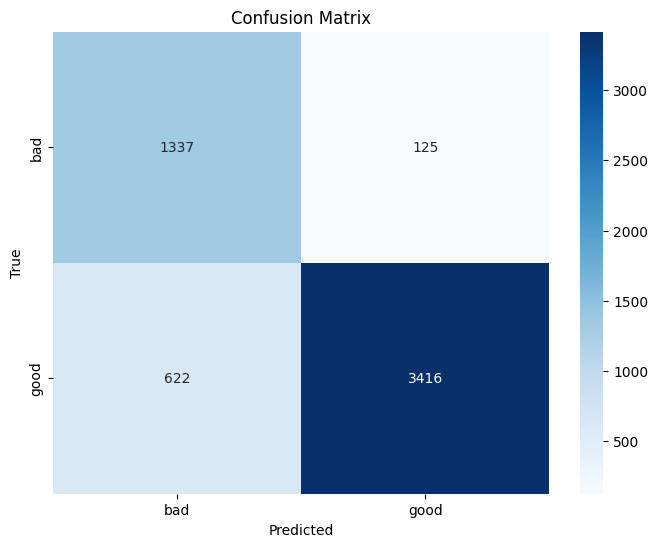

              precision    recall  f1-score   support

          -1       0.68      0.90      0.78      1462
           1       0.96      0.85      0.90      4038

    accuracy                           0.86      5500
   macro avg       0.82      0.87      0.84      5500
weighted avg       0.89      0.86      0.87      5500

None


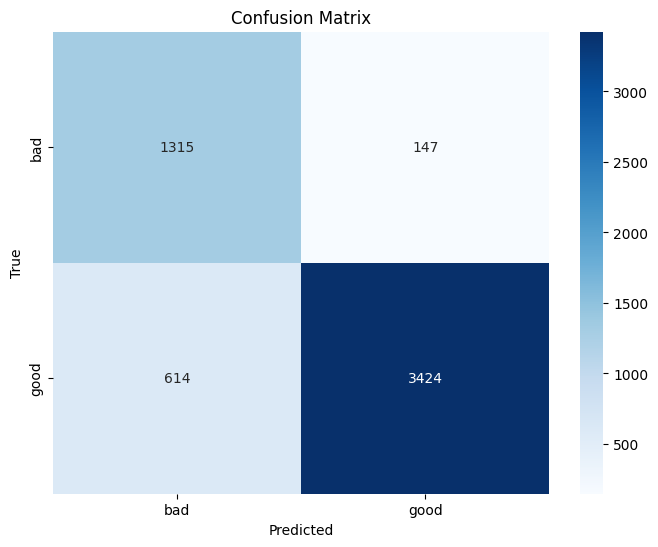

Accuracy of GNB using modified embedding dataset: [0.864182]
Accuracy of BNB using modified embedding dataset: [0.861636]
Mean accuracy of GNB using modified embedding dataset: 0.864182
Mean accuracy of BNB using modified embedding dataset: 0.861636


In [12]:
# embedding dataset
GNB_Acc_1_embedding = []
BNB_Acc_1_embedding = []
MNB_Acc_1_embedding= []

X_train = removed_train_embedding
y_train = removed_train_label

#---------------- Gaussian Naive Bayes------------------#
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train)
gaussian_predictions = gaussian_clf.predict(X_validation_embeddings)
gaussian_acc = accuracy_score(y_validation_target, gaussian_predictions)
GNB_Acc_1_embedding.append(gaussian_acc.round(6))

cm = confusion_matrix(y_validation_target, gaussian_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#---------------Bernoulli Naive Bayes-------------------#
bernoulli_clf = BernoulliNB()
bernoulli_clf.fit(X_train, y_train)
bernoulli_predictions = bernoulli_clf.predict(X_validation_embeddings)
bernoulli_acc = accuracy_score(y_validation_target, bernoulli_predictions)
BNB_Acc_1_embedding.append(bernoulli_acc.round(6))
print(print(classification_report(y_validation_target, bernoulli_predictions, zero_division = 0)))

cm = confusion_matrix(y_validation_target, bernoulli_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

    

print("Accuracy of GNB using modified embedding dataset:", GNB_Acc_1_embedding)
print("Accuracy of BNB using modified embedding dataset:", BNB_Acc_1_embedding)  
print("Mean accuracy of GNB using modified embedding dataset:", np.mean(GNB_Acc_1_embedding).round(6))  
print("Mean accuracy of BNB using modified embedding dataset:", np.mean(BNB_Acc_1_embedding).round(6)) 



In this section, we will use K nearest neighbour, also called KNN, to find the corresponding accuracy

In [37]:
# use tf-idf dataset
k = 5
while k <= 100:
    KNN_Acc_weighted = []
    
    print("-----------------for k value is", k, " -------------------")
    print()
    start = time.time()
    
    KNN_inverse = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    KNN_inverse.fit(X_train_tfidf, y_train_target)
    inverse_predictions = KNN_inverse.predict(X_validation_tfidf)
    accuracy_inverse = accuracy_score(y_validation_target, inverse_predictions)
    end = time.time()
    t = end - start
    print("Accuracy of KNN(weighted):", accuracy_inverse.round(6))
    print()
    
    print("time used(s) for weighted KNN", t)
    k += 5

k = 5
while k <= 100:
    KNN_Acc_majority = []
    print("-----------------for k value is", k, " -------------------")
    print()
    start = time.time()
    KNN_majority = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    KNN_majority.fit(X_train_tfidf, y_train_target)
    majority_predictions = KNN_majority.predict(np.array(X_validation_tfidf))
    accuracy_majority = accuracy_score(y_validation_target, majority_predictions)
    end = time.time()
    t = end - start    
    print("time consumed:", t)
    # print("Accuracy of weighted KNN", accuracy_inverse.round(6))
    print("Accuracy of KNN(majority):", accuracy_majority.round(6))

    k += 5



-----------------for k value is 5  -------------------

Accuracy of KNN(weighted): 0.778

time used(s) for weighted KNN 1.0939197540283203
-----------------for k value is 10  -------------------

Accuracy of KNN(weighted): 0.545273

time used(s) for weighted KNN 1.1027984619140625
-----------------for k value is 15  -------------------

Accuracy of KNN(weighted): 0.516909

time used(s) for weighted KNN 1.126044511795044
-----------------for k value is 20  -------------------

Accuracy of KNN(weighted): 0.545091

time used(s) for weighted KNN 1.1413357257843018
-----------------for k value is 25  -------------------

Accuracy of KNN(weighted): 0.491273

time used(s) for weighted KNN 1.134181022644043
-----------------for k value is 30  -------------------

Accuracy of KNN(weighted): 0.525455

time used(s) for weighted KNN 1.1619911193847656
-----------------for k value is 35  -------------------

Accuracy of KNN(weighted): 0.490364

time used(s) for weighted KNN 1.165970802307129
------

In [38]:
# use embedding dataset
k = 5

while k <= 100:
    KNN_Acc_weighted = []
    KNN_Acc_majority = []
    
    
    KNN_inverse = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    KNN_inverse.fit(X_train_embeddings, y_train_target)
    inverse_predictions = KNN_inverse.predict(X_validation_embeddings)
    accuracy_inverse = accuracy_score(y_validation_target, inverse_predictions)

    start = time.time()
    KNN_majority = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    KNN_majority.fit(X_train_embeddings, y_train_target)
    majority_predictions = KNN_majority.predict(np.array(X_validation_embeddings))
    accuracy_majority = accuracy_score(y_validation_target, majority_predictions)

        
    print("-----------------for k value is ", k, " -------------------")
    # print("Accuracy of weighted KNN", accuracy_inverse.round(6))
    print("Accuracy of KNN:", accuracy_majority.round(6))
    end = time.time()
    t = end - start
    print("time used(s)", t)

    k += 5

-----------------for k value is  5  -------------------
Accuracy of KNN: 0.882182
time used(s) 1.1459729671478271
-----------------for k value is  10  -------------------
Accuracy of KNN: 0.887091
time used(s) 1.1078829765319824
-----------------for k value is  15  -------------------
Accuracy of KNN: 0.886727
time used(s) 1.1522796154022217
-----------------for k value is  20  -------------------
Accuracy of KNN: 0.888364
time used(s) 1.158480167388916
-----------------for k value is  25  -------------------
Accuracy of KNN: 0.884909
time used(s) 1.1502516269683838
-----------------for k value is  30  -------------------
Accuracy of KNN: 0.887818
time used(s) 1.1792373657226562
-----------------for k value is  35  -------------------
Accuracy of KNN: 0.885455
time used(s) 1.1354877948760986
-----------------for k value is  40  -------------------
Accuracy of KNN: 0.885273
time used(s) 1.1840558052062988
-----------------for k value is  45  -------------------
Accuracy of KNN: 0.882727

In this section, we will try logistic regression
and we may find the best value of max_iteration


This will take a while. Be Patiet!
-------------tfidf dataset---------------

Accuracy of tf-idf:  0.906364


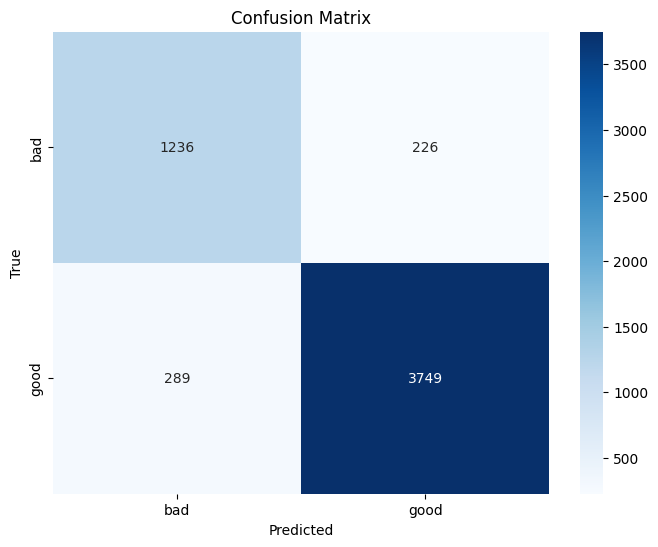

Accuracy of modified tf-idf:  0.9049090909090909



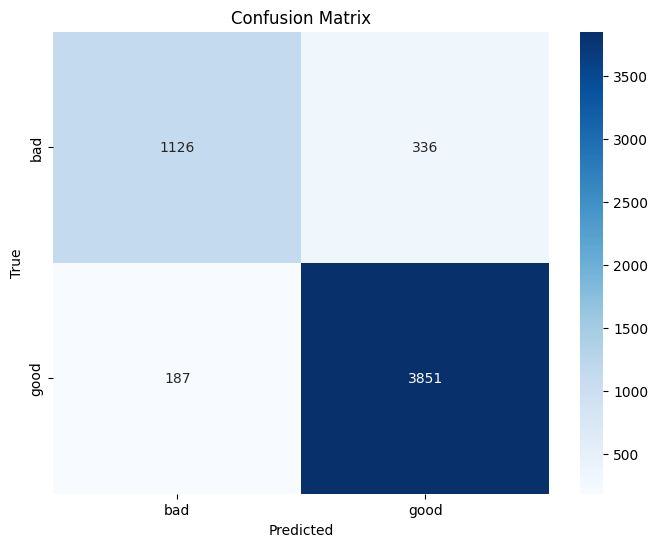

-----------embedding dataset------------

Accuracy of embedding: 0.919636


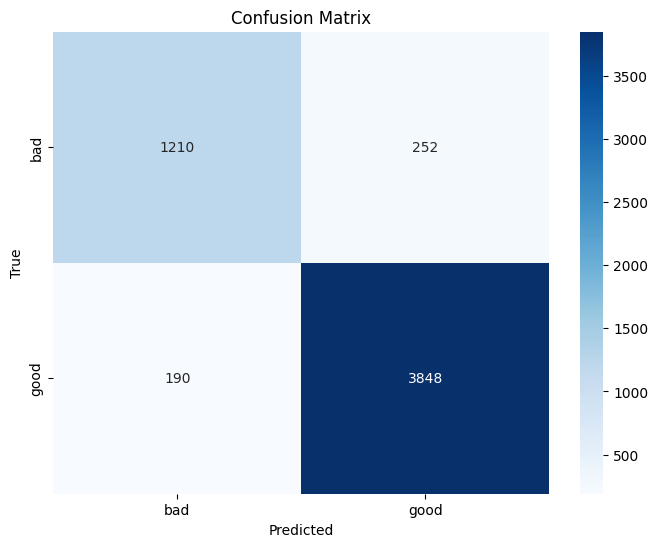

Accuracy of modified embedding:  0.9154545454545454



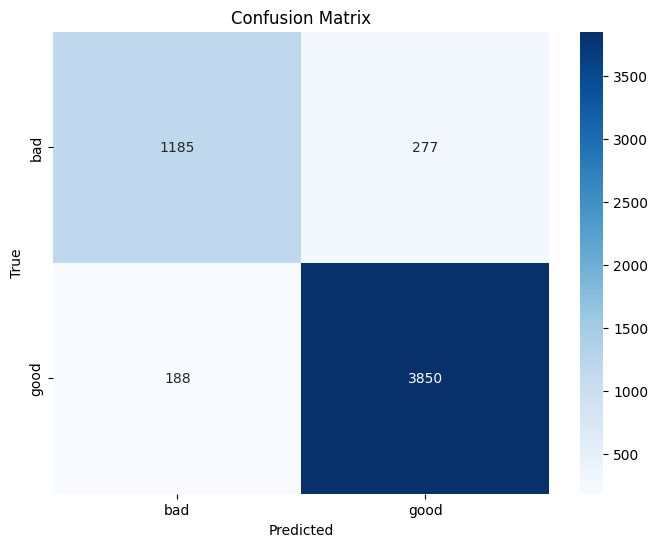

In [13]:



warnings.simplefilter(action='ignore', category=UserWarning)

# Define the parameter grid to search over
param_grid = {'max_iter': [100, 500, 1000, 5000, 10000, 1000000]}

# Create a logistic regression classifier
lgr = LogisticRegression(max_iter = 10000)

print("This will take a while. Be Patiet!")

print("-------------tfidf dataset---------------")
print()
lgr.fit(X_train_tfidf, y_train_target)
print("Accuracy of tf-idf: ", accuracy_score(lgr.predict(X_validation_tfidf), y_validation_target).round(6))
cm = confusion_matrix(y_validation_target, lgr.predict(X_validation_tfidf))


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

lgr.fit(removed_train_tfidf, removed_train_label)
print("Accuracy of modified tf-idf: ", accuracy_score(lgr.predict(X_validation_tfidf), y_validation_target))
print()
cm = confusion_matrix(y_validation_target, lgr.predict(X_validation_tfidf))


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("-----------embedding dataset------------")
print()
# Use GridSearchCV to find the best max_iter value
lgr.fit(X_train_embeddings, y_train_target)
print("Accuracy of embedding:", accuracy_score(lgr.predict(X_validation_embeddings), y_validation_target).round(6))
cm = confusion_matrix(y_validation_target, lgr.predict(X_validation_embeddings))


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

lgr.fit(removed_train_embedding, removed_train_label)
print("Accuracy of modified embedding: ", accuracy_score(lgr.predict(X_validation_embeddings), y_validation_target))
print()
cm = confusion_matrix(y_validation_target, lgr.predict(X_validation_embeddings))


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [59]:
data_test = pd.read_csv("2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/TEST_NO_LABELS.csv")
test_tfidf = pd.read_csv("2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/TFIDF_TEST.csv")
test_embeddings = pd.read_csv("2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/2023-08-24_COMP90049_ASSIGNMENT3_DATA_FOR_STUDENT_V4/384EMBEDDINGS_TEST.csv")
print(data_test.shape)
print(test_tfidf.shape)
print(test_embeddings.shape)

y_train = y_train_target
lgr = LogisticRegression(max_iter = 10000)
lgr.fit(X_train_embeddings, y_train)
prediction = lgr.predict(test_embeddings.iloc[:,1:])
print(prediction.shape)
print(type(prediction))
print(type(test_tfidf.iloc[:,1]))
combined_df = pd.DataFrame({'id': data_test.iloc[:, 0],'rating': prediction})
print(type(combined_df))
print(combined_df.shape)
combined_df.to_csv("1053051.csv",index=False)

(5514, 4)
(5514, 501)
(5514, 385)
(5514,)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
(5514, 2)
